<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/12_FilterTypesAndStructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Filter Types and Structures</h1>**

# 1. More Filter types


## 1.1 Comb filters
Comb filters are signal processing filters used to either add or remove certain frequencies from a signal. The name "comb" comes from the shape of their frequency response, which has a series of regularly spaced peaks and notches that resemble the teeth of a comb. These filters can be implemented in digital or analog form and are particularly useful in various applications like audio processing, telecommunications, and radar systems.

in Math Model

$
y[n] = \sum_{k=0}^{K} \alpha_k \cdot x[n - kL] + \sum_{k=1}^{J} \beta_k \cdot y[n - kL]
$

if 'parent' filter impulse response h[n] becomes comb filter output as:

$
g[n] = \{h[0], \underbrace{0, 0, \ldots, 0}_{L-1 \text{ zeros}}, h[1], \underbrace{0, 0, \ldots, 0}_{L-1 \text{ zeros}}, h[2], \ldots\}
$

then,

$
G(z) = \sum_{n} g[n]z^{-n} = \sum_{n} h[n]z^{-nL} = H(z^L)
$

Hence Frequency response :



Text(0.5, 0, '$ \\cdot \\pi$')

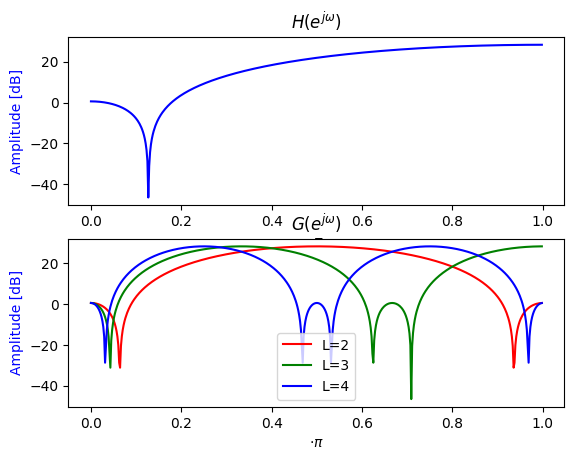

In [23]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse response h[n]
h_1 = [6.761, -12.456, 6.761]

w, h_ejw = signal.freqz(h_1)
w_label = w/np.pi

h_comb = [6.761,0, -12.456,0, 6.761]
h_comb_2 = [6.761,0,0, -12.456,0,0, 6.761]
h_comb_3 = [6.761,0,0,0, -12.456,0,0,0, 6.761]
# h_comb_4 = [6.761,0,0,0,0, -12.456,0,0,0,0, 6.761]

w, g_ejw  = signal.freqz(h_comb)
w, g_ejw_2  = signal.freqz(h_comb_2)
w, g_ejw_3  = signal.freqz(h_comb_3)

fig, axs = plt.subplots(2,1)
axs[0].set_title('$H(e^{j\omega})$')
axs[0].plot(w_label, 20 * np.log10(abs(h_ejw)), 'b')
axs[0].set_ylabel('Amplitude [dB]', color='b')
axs[0].set_xlabel('$ \cdot \pi$')

axs[1].set_title('$G(e^{j\omega})$')
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw)), 'r',label="L=2")
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw_2)), 'g',label="L=3")
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw_3)), 'b',label="L=4")
axs[1].legend()
axs[1].set_ylabel('Amplitude [dB]', color='b')
axs[1].set_xlabel('$ \cdot \pi$')


# ax2 = ax1.twinx()
# angles = np.unwrap(np.angle(h))
# ax2.plot(w_label, angles, 'g')
# ax2.set_ylabel('Angle (radians)', color='g')
# ax2.grid(True)
# ax2.axis('tight')
# plt.show()


### Applications of Comb Filters
Audio Processing: Comb filters are used in audio equalization, reverberation, and for creating special effects like flanging and phasing.
Telecommunications: They help in multipath interference reduction, where signals that have taken different paths interfere destructively.
Radar Systems: Comb filters can help in isolating specific frequencies returned by the radar echo, aiding in signal clarity and object detection.
Image Processing: In video and image applications, comb filters are used to separate chrominance (color) and luminance (brightness) signals, enhancing picture quality.



## 1.2 All Pass filters

An allpass filter is a type of signal processing filter that passes all frequencies of the input signal equally in magnitude but changes the phase of the signal at different frequencies. The primary purpose of an allpass filter is not to separate frequency components by amplitude but to adjust the phase relationships between various frequencies in a signal.

**Key Characteristics**

* Constant Amplitude: The magnitude response of an allpass filter is constant across all frequencies, meaning it does not attenuate any part of the input signal based on frequency.
* Phase Shift: The phase response is a function of frequency. The filter introduces a phase shift that changes with frequency, allowing for the correction of phase distortions or the creation of specific phase effects.
* Impulse Response: Depending on the filter order (first order, second order, etc.), the impulse response can be simple or more complex. Higher-order filters provide greater control over the phase characteristics.

$
A_M(z) = \frac{d + d_1z^{-1} + \ldots + d_{M-1}z^{-(M-1)} + z^{-M}}{1 + d_1z^{-1} + \ldots + d_{M-1}z^{-(M-1)} + dz^{-M}}
$

$
A_M(z) = \frac{z^{-M} D_M(z^{-1})}{D_M(z)}
$

**Properties of Poles and Zeros:**

* **Poles:** $A_M(z)$ has poles where $D_M(\lambda) = 0$. These are the values of $z$ that make the denominator zero.

* **Zeros:** $A_M(z)$ has zeros where $\xi = \frac{1}{\lambda}$​ such that $\lambda^{-1}$ are the values that make the numerator zero. This relationship highlights that zeros of the allpass filter are the reciprocals of the poles on the z-plane.

Zeros: [0.75+0.37080992j 0.75-0.37080992j]
Poles: [1.07142857+0.52972846j 1.07142857-0.52972846j]


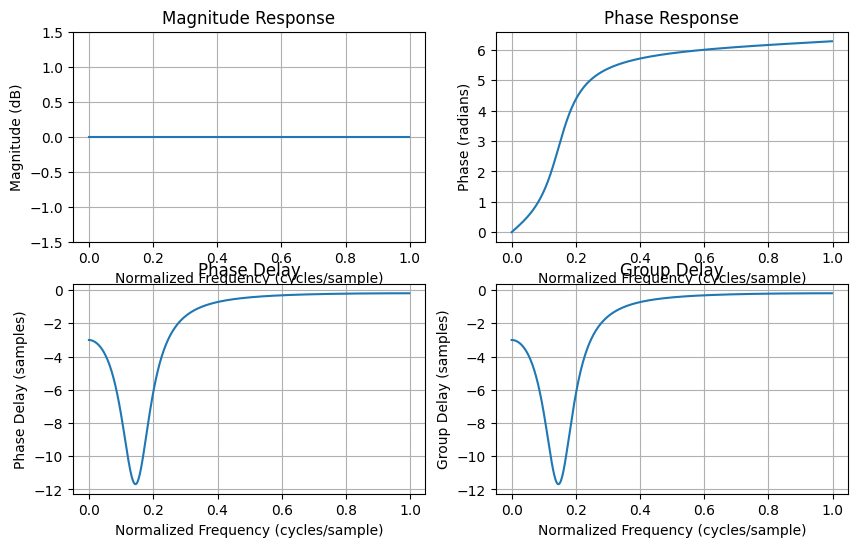

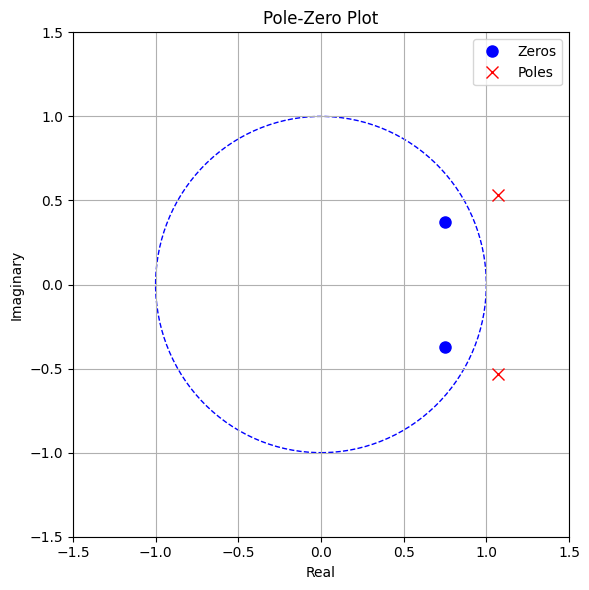

In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Example all-pass filter coefficients
b = [1, -1.5, 0.7]  # Numerator coefficients
a = [0.7, -1.5, 1]  # Denominator coefficients

# Calculate the zeros and poles
zeros = np.roots(b)
poles = np.roots(a)

# Frequency response
w, h = signal.freqz(b, a)

# Phase response
phase = np.unwrap(np.angle(h))
# Phase delay
phase_delay = -np.diff(phase)/np.diff(w)
# Group delay
group_delay = signal.group_delay((b, a))[1]

# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title('Magnitude Response')
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-1.5, 1.5)
plt.grid(True)

# Plot the phase response
plt.subplot(2, 2, 2)
plt.title('Phase Response')
plt.plot(w / np.pi, phase)
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Plot the phase delay
plt.subplot(2, 2, 3)
plt.title('Phase Delay')
plt.plot(w[:-1] / np.pi, phase_delay)
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Phase Delay (samples)')
plt.grid(True)

# Plot the group delay
plt.subplot(2, 2, 4)
plt.title('Group Delay')
plt.plot(w / np.pi, group_delay)
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Group Delay (samples)')
plt.grid(True)

# Plot the poles and zeros
plt.figure(figsize=(6, 6))
plt.title('Pole-Zero Plot')
plt.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=8, label='Zeros')
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=8, label='Poles')
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Print pole and zero locations
print("Zeros:", zeros)
print("Poles:", poles)

plt.show()


# 1. More Filter types
## Comb filters

imagine it have pole
## All Pass filters

give example if we cascade series filter with allpass filter to correction the phase

Final Exam : Minimum Phase Cascade with Allpass Filter


##
Breakdown H_f to H_minphase and H_allpass


only need change the floating point ??

Practice about TF to Cascade/SOS .

design filter in period filter(IZT ?).